In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 8)
!date

%load_ext autoreload
%autoreload 2

Tue Sep  8 21:20:57 PDT 2020


In [2]:
import vivarium_uw_covid as vuc

# Demonstration run of COVID sim with data from artifact

In [3]:
art_fname='src/vivarium_uw_covid/artifacts/wisc.hdf'
data = vuc.data_dict_from_artifact(art_fname)

Loading all COVID-19 projection data from src/vivarium_uw_covid/artifacts/wisc.hdf


In [4]:
beta_final = vuc.make_beta(data['coeffs'], data['df_covs'], data['beta_fit'])

In [5]:
n_draws = 12
start_time = pd.Timestamp('2020-09-14')
end_time = pd.Timestamp('2020-12-31')

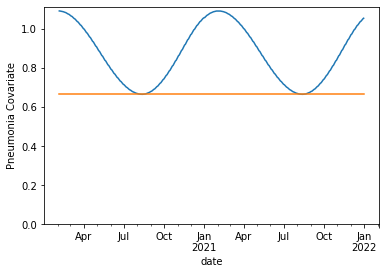

In [6]:
alt_covs = data['df_covs'].copy()
alt_covs.pneumonia = np.min(alt_covs.pneumonia)

data['df_covs'].pneumonia.plot(label='Reference Scenario')
alt_covs.pneumonia.plot(label='Alternative Scenario')
plt.ylabel('Pneumonia Covariate')
plt.axis(ymin=0);

In [7]:
beta_alt_final = vuc.make_beta(data['coeffs'], alt_covs, data['beta_fit'])

In [8]:
initial_states = data['compartment_sizes'].loc[start_time].dropna().set_index('draw')

In [9]:
%%time

np.random.seed(12345)  # set random seed for reproducilibity
df_baseline_dict = vuc.run_compartmental_model(
                        n_draws, -1,
                        params=data['params'],
                        beta=beta_final,
                        start_time=start_time,
                        end_time=end_time,
                        initial_states=initial_states
                    )

CPU times: user 35.7 s, sys: 1.91 s, total: 37.6 s
Wall time: 32.9 s



Cumulative infections on 12/11/20:
    470,813 (95% UI 237,147 to 1,061,438)



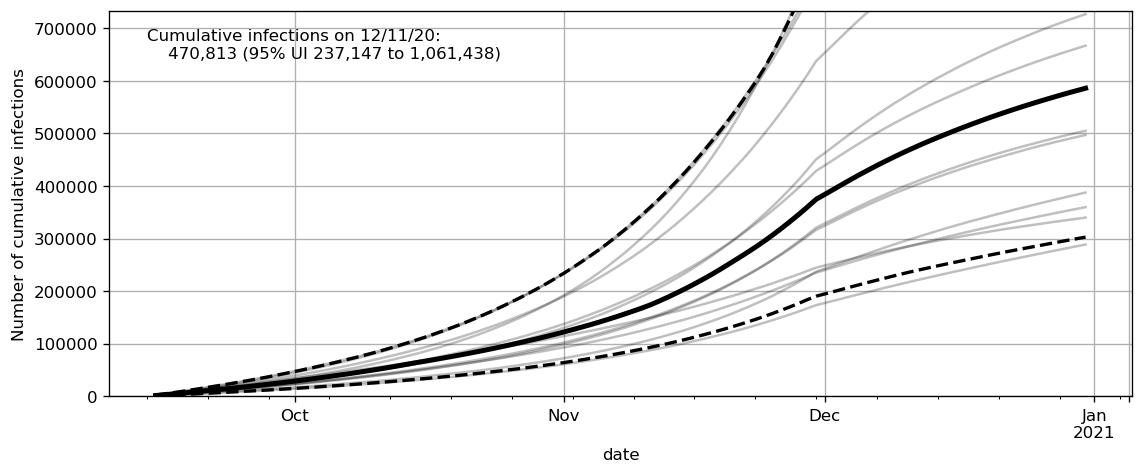

In [10]:
vuc.plot_results(df_baseline_dict,
                 metric='cumulative_infections')

In [11]:
%%time

np.random.seed(12345)  # set random seed for reproducilibity
df_alt_dict = vuc.run_compartmental_model(
                        n_draws, -1,
                        params=data['params'],
                        beta=beta_alt_final,
                        start_time=start_time,
                        end_time=end_time,
                        initial_states=initial_states
                    )

CPU times: user 36.7 s, sys: 2.11 s, total: 38.8 s
Wall time: 34.1 s



Cumulative infections on 12/11/20:
    164,028 (95% UI 87,484 to 370,166)



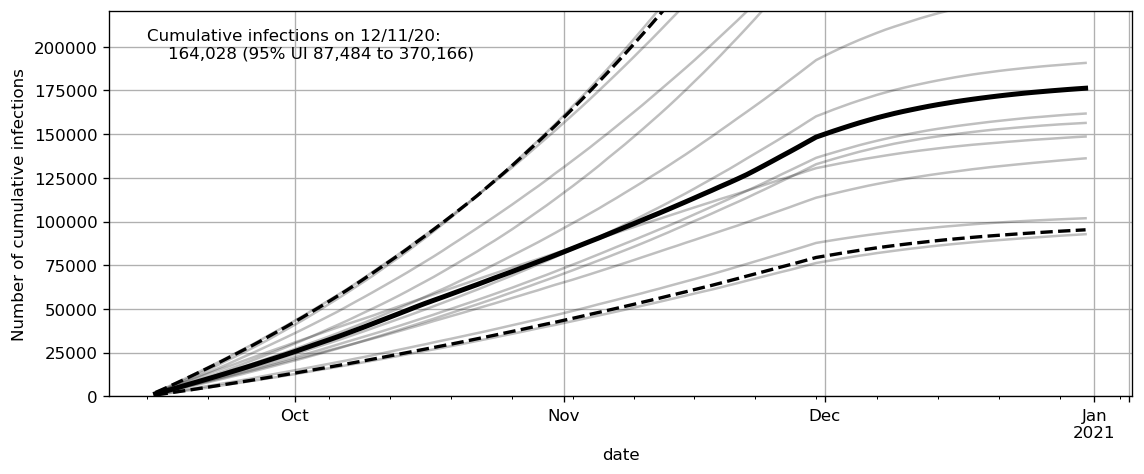

In [12]:
vuc.plot_results(df_alt_dict,
                 metric='cumulative_infections')